# Semantic NLP Filtering for Deep Learning Papers in Virology and Epidemiology
### Abstract
This study presents a targeted approach for filtering and classifying academic research papers from a dataset retrieved through keyword-based searches on PubMed, aimed at identifying works that apply deep learning neural network methods within virology and epidemiology. The dataset comprises 11,450 records collected with keywords related to machine learning and domain-specific terms. Using advanced Natural Language Processing (NLP) techniques, particularly the Sentence-BERT (SBERT) model, this analysis processes and refines the dataset to identify papers most relevant to neural network-based deep learning implementations. SBERT embeddings enable high-quality semantic representation of abstracts, facilitating efficient similarity-based filtering to measure and rank the relevance of each paper to specified topics. This methodology allows for the effective extraction of key research trends, techniques, and applications within virology and epidemiology, supporting researchers in quickly locating impactful studies on deep learning applications in these fields.

### Task
1. Implement semantic natural language processing techniques to filter out papers that do not meet
the criteria of utilizing deep learning approaches in virology/epidemiology.
2. For the papers deemed relevant, classify them according to the type of method used: ["text
mining", "computer vision", "both", "other"].
3. Extract and report the name of the method used for each relevant paper.

### Libraries and Dataset Loading
This section imports necessary libraries and loads the dataset containing abstracts of research papers on virology and epidemiology with an emphasis on machine learning applications.

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm, trange
from sentence_transformers import SentenceTransformer, util
import numpy as np
import re
import nltk
import torch
import scipy.stats as stats
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from collections import Counter


C:\Users\dsohi\AppData\Local\Temp\ipykernel_14772\224249301.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


### Data Collection Procedure

The dataset for this study was sourced from the publicly accessible **Virology AI Papers Repository**, which compiles research articles at the intersection of virology, epidemiology, and artificial intelligence applications. The repository contains metadata of **11,450 academic papers** from PubMed, focusing on deep learning and neural networks in virology and epidemiology. The dataset includes fields such as PubMed ID (PMID), paper title, authors, citations, journal/book, publication year, DOI, and abstracts (optional). It provides accessible metadata for research and links to PubMed Central for full-text access when available.

**Data Source Repository**: [Virology AI Papers Repository](https://github.com/jd-coderepos/virology-ai-papers/)

**Data Source**: [PubMed](https://pubmed.ncbi.nlm.nih.gov/)

###  Query

1. **Neural Networks**: 3,791 results  
   Query: (((virology) OR (epidemiology)) AND (("neural network") OR ("artificial neural network") OR ("machine learning model") OR ("feedforward neural network") OR ("neural net algorithm") OR ("multilayer perceptron") OR ("convolutional neural network") OR ("recurrent neural network") OR ("long short-term memory network") OR ("CNN") OR ("GRNN") OR ("RNN") OR ("LSTM")))  


2. **Deep Learning**: 2,664 results  
   Query: (((virology) OR (epidemiology)) AND (("deep learning") OR ("deep neural networks")))  


3. **Computer Vision**: 3,647 results  
   Query: (((virology) OR (epidemiology)) AND (("computer vision") OR ("vision model") OR ("image processing") OR ("vision algorithms") OR ("computer graphics and vision") OR ("object recognition") OR ("scene understanding")))  


4. **Natural Language Processing (NLP)**: 2,237 results  
   Query: (((virology) OR (epidemiology)) AND (("natural language processing") OR ("text mining") OR (NLP) OR ("computational linguistics") OR ("language processing") OR ("text analytics") OR ("textual data analysis") OR ("text data analysis") OR ("text analysis") OR ("speech and language technology") OR ("language modeling") OR ("computational semantics")))  


5. **Generative AI**: 75 results  
   Query: (((virology) OR (epidemiology)) AND (("generative artificial intelligence") OR ("generative AI") OR ("generative deep learning") OR ("generative models")))  


6. **Transformer Models**: 262 results  
   Query: (((virology) OR (epidemiology)) AND (("transformer models") OR ("self-attention models") OR ("transformer architecture") OR ("transformer") OR ("attention-based neural networks") OR ("transformer networks") OR ("sequence-to-sequence models")))  


7. **Large Language Models (LLM)**: 183 results  
   Query: (((virology) OR (epidemiology)) AND (("large language model") OR (llm) OR ("transformer-based model") OR ("pretrained language model") OR ("generative language model") OR ("foundation model") OR ("state-of-the-art language model")))  


8. **Multimodal Models**: 121 results  
   Query: (((virology) OR (epidemiology)) AND (("multimodal model") OR ("multimodal neural network") OR ("vision transformer") OR ("diffusion model") OR ("generative diffusion model") OR ("diffusion-based generative model") OR ("continuous diffusion model")))  

---

**Total records**: 12,980 (with duplicates)


### Data Loading


In [2]:
file_path = 'https://raw.githubusercontent.com/jd-coderepos/virology-ai-papers/main/collection_with_abstracts.csv'
data = pd.read_csv(file_path)
data.head()

PMID                                              Title  \
0  39435445  Editorial: The operationalization of cognitive...   
1  39398866  Characterization of arteriosclerosis based on ...   
2  39390053  Multi-scale input layers and dense decoder agg...   
3  39367648  An initial game-theoretic assessment of enhanc...   
4  39363262  Truncated M13 phage for smart detection of E. ...   

                                             Authors  \
0  Winter M, Probst T, Tallon M, Schobel J, Pryss R.   
1  Zhou J, Li X, Demeke D, Dinh TA, Yang Y, Janow...   
2                                      Lan X, Jin W.   
3  Fatemi MY, Lu Y, Diallo AB, Srinivasan G, Azhe...   
4  Yuan J, Zhu H, Li S, Thierry B, Yang CT, Zhang...   

                                            Citation First Author  \
0  Front Neurosci. 2024 Oct 7;18:1501636. doi: 10...     Winter M   
1  J Med Imaging (Bellingham). 2024 Sep;11(5):057...       Zhou J   
2  Sci Rep. 2024 Oct 10;14(1):23729. doi: 10.1038...        Lan X   
3  Brief Bioinform. 2024 Sep 23;25(6):bbae476. do...    Fatemi MY   
4  J Nanobiotechnology. 2024 Oct 3;22(1):599. doi...       Yuan J   

                 Journal/Book  Publication Year Create Date        PMCID  \
0              Front Neurosci              2024  2024/10/22  PMC11491427   
1  J Med Imaging (Bellingham)              2024  2024/10/14  PMC11466048   
2                     Sci Rep              2024  2024/10/10  PMC11467340   
3             Brief Bioinform              2024  2024/10/05  PMC11452536   
4         J Nanobiotechnology              2024  2024/10/04  PMC11451008   

  NIHMS ID                         DOI  \
0      NaN  10.3389/fnins.2024.1501636   
1      NaN   10.1117/1.JMI.11.5.057501   
2      NaN  10.1038/s41598-024-74701-0   
3      NaN         10.1093/bib/bbae476   
4      NaN  10.1186/s12951-024-02881-y   

                                            Abstract  
0                                                NaN  
1  PURPOSE: Our purpose is to develop a computer ...  
2  Accurate segmentation of COVID-19 lesions from...  
3  The application of deep learning to spatial tr...  
4  BACKGROUND: The urgent need for affordable and...

### Data Description
To understand the distribution of topics and keywords in the dataset, this section presents a series of visualizations on the frequency and relevance of keywords.

In [3]:
#Data description process
print(data.info())  # General information about the dataset



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11450 entries, 0 to 11449
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PMID              11450 non-null  int64 
 1   Title             11450 non-null  object
 2   Authors           11450 non-null  object
 3   Citation          11450 non-null  object
 4   First Author      11450 non-null  object
 5   Journal/Book      11450 non-null  object
 6   Publication Year  11450 non-null  int64 
 7   Create Date       11450 non-null  object
 8   PMCID             6450 non-null   object
 9   NIHMS ID          956 non-null    object
 10  DOI               10969 non-null  object
 11  Abstract          11237 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.0+ MB
None


In [4]:
#  distribution of abstract lengths
abstract_lengths = data['Abstract'].str.len()
print(abstract_lengths.describe())


count    11237.000000
mean      1723.080182
std        575.944666
min          4.000000
25%       1386.000000
50%       1699.000000
75%       1983.000000
max      20492.000000
Name: Abstract, dtype: float64


In [5]:

# Count the number of missing abstracts
missing_abstracts_count = data['Abstract'].isna().sum()

# Filter out entries without abstracts
data_with_abstract = data.dropna(subset=['Abstract'])

# Report the dataset size before and after filtering
initial_size = data.shape[0]
filtered_size = data_with_abstract.shape[0]

print(f"Missing abstracts: {missing_abstracts_count}, Initial size: {initial_size}, Filtered size: {filtered_size}")

Missing abstracts: 213, Initial size: 11450, Filtered size: 11237


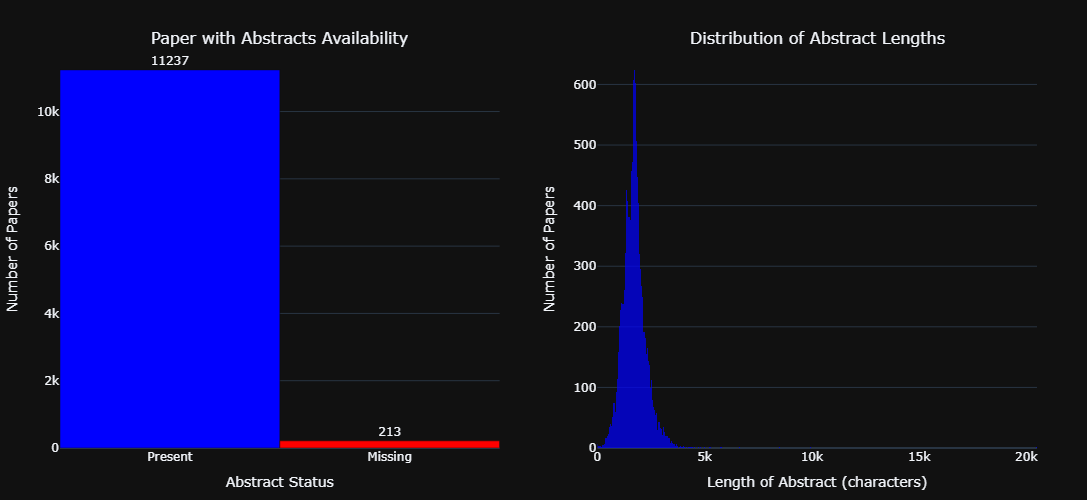

In [6]:


# Create subplots: 1 row, 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=("Paper with Abstracts Availability", "Distribution of Abstract Lengths"))

# Plot 1: Paper Abstracts Availability
fig.add_trace(
    go.Bar(
        x=['Present', 'Missing'],
        y=[filtered_size, missing_abstracts_count],
        marker_color=['blue', 'red'],
        text=[filtered_size, missing_abstracts_count],  
        textposition='outside'  
    ),
    row=1, col=1
)

# Plot 2: Distribution of Abstract Lengths
fig.add_trace(
    go.Histogram(
        x=abstract_lengths,  # Abstract lengths on the X-axis
        marker_color='blue',
        opacity=0.7,
           
       
    ),
    row=1, col=2
)

# Update layout for combined figure
fig.update_layout(
    showlegend=False,
    hovermode='x unified',
    height=500,
    width=1000,  # Adjust width to give more space for histograms
    template='plotly_dark',  # Apply dark theme for better contrast
    xaxis=dict(
        range=[0, max(abstract_lengths)]),
    margin=dict(l=50, r=50, t=50, b=50)  # Adjust margins for readability
)

# X and Y-axis titles for each subplot
fig.update_xaxes(title_text="Abstract Status", row=1, col=1)
fig.update_yaxes(title_text="Number of Papers", row=1, col=1)
fig.update_xaxes(title_text="Length of Abstract (characters)", row=1, col=2)
fig.update_yaxes(title_text="Number of Papers", row=1, col=2)

# Show the figure
fig.show()


**Data Preprocessing**

The preprocessing of abstracts involves applying several NLP techniques to clean and prepare the text for further analysis. This includes converting the text to lowercase, removing special characters, lemmatizing words to their root forms, eliminating stopwords, and expanding certain terms to ensure they are relevant for deep learning models. These steps help standardize the text and improve its effectiveness in subsequent modeling tasks.

In [7]:

# Download required NLTK resources
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab') 

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define a single preprocessing function
def preprocess_abstracts(data, abstract_col='Abstract'):
    """
    Preprocesses the abstracts by applying multiple NLP steps:
    - Converts text to lowercase
    - Removes special characters
    - Lemmatizes words to base form
    - Removes stopwords
 
    
    Parameters:
        data (pd.DataFrame): DataFrame containing abstracts in the specified column
        abstract_col (str): Column name containing abstracts (default 'Abstract')
    
    Returns:
        pd.DataFrame: DataFrame with preprocessed abstracts and sentence segmentation
    """

    
    def preprocess_text(text):
        # Lowercase conversion
        text = text.lower()
        
        # Remove special characters and digits
        text = re.sub(r'[^a-z\s]', '', text)
        
        # Lemmatize and remove stopwords
        text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
        
        return text
    

    
    # Apply preprocessing steps with .loc to avoid SettingWithCopyWarning
    data = data.copy()  # Ensure we're working with a full DataFrame copy to prevent chained assignment
    data.loc[:, abstract_col] = data[abstract_col].astype(str)  # Ensure text format
    data.loc[:, 'Preprocessed_Abstract'] = data[abstract_col].apply(preprocess_text)

    
    return data



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dsohi\Documents\Semantic NLP Filtering for
[nltk_data]     Deep Learning Papers in Virology
[nltk_data]     Epidemiology\myenv\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dsohi\Documents\Semantic NLP Filtering for
[nltk_data]     Deep Learning Papers in Virology
[nltk_data]     Epidemiology\myenv\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dsohi\Documents\Semantic NLP Filtering for
[nltk_data]     Deep Learning Papers in Virology
[nltk_data]     Epidemiology\myenv\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [8]:
data_with_abstract = preprocess_abstracts(data_with_abstract)

In [9]:
data_with_abstract['Preprocessed_Abstract'].head()

1    purpose purpose develop computer vision approa...
2    accurate segmentation covid lesion medical ima...
3    application deep learning spatial transcriptom...
4    background urgent need affordable rapid detect...
5    background incidental extrapulmonary finding c...
Name: Preprocessed_Abstract, dtype: object

### TASK 1 : Implement semantic natural language processing techniques to filter out papers that do not meet the criteria of utilizing deep learning approaches in virology/epidemiology.

**Semantic natural language processing technique using Senetence Transformers (SBERT)**

In [10]:
# Load a lightweight transformer model suitable for efficient semantic embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')  # Optimal for faster processing on larger datasets


**Keywords related to Deep learning based on query search performed on original data collection process**

In [11]:
deep_learning_keywords = [
    
    # Neural Networks
    "neural network", "artificial neural network", "machine learning model", 
    "feedforward neural network", "neural net algorithm", "multilayer perceptron", 
    "convolutional neural network", "recurrent neural network", 
    "long short-term memory network", "CNN", "GRNN", "RNN", "LSTM",
    
    # Deep Learning
    "deep learning", "deep neural networks",
    
    # Computer Vision
    "computer vision", "vision model", "image processing", 
    "vision algorithms", "computer graphics and vision", "object recognition", 
    "scene understanding",
    
    # Natural Language Processing
    "natural language processing", "text mining", "NLP", 
    "computational linguistics", "language processing", "text analytics", 
    "textual data analysis", "speech and language technology", 
    "language modeling", "computational semantics",
    
    # Generative AI
    "generative artificial intelligence", "generative AI", 
    "generative deep learning", "generative models",
    
    # Transformer Models
    "transformer models", "self-attention models", "transformer architecture", 
    "transformer", "attention-based neural networks", "transformer networks", 
    "sequence-to-sequence models",
    
    # Large Language Models
    "large language model", "LLM", "transformer-based model", 
    "pretrained language model", "generative language model", 
    "foundation model", "state-of-the-art language model",
    
    # Multimodal Models
    "multimodal model", "multimodal neural network", 
    "vision transformer", "diffusion model", 
    "generative diffusion model", "diffusion-based generative model", 
    "continuous diffusion model"
]

**Embeddings for the abstracts**

In [12]:
# %%time
# data_with_abstract['Abstract_Embeddings'] = data_with_abstract['Preprocessed_Abstract'].apply(lambda x: model.encode(x, convert_to_tensor=True))

Created a Pickle and csv  file to save the dataframe after preprocessed embedding and for faster processing

In [13]:
#data_with_abstract.to_pickle('results/Preprocessed_dataset.pkl')
data_with_abstract.to_csv('results/Preprocessed_dataset.csv')


In [14]:
data_with_abstract = pd.read_pickle('data/Preprocessed_dataset.pkl')

**Embeddings for the keywords**

In [15]:
%%time
keyword_embeddings = model.encode(deep_learning_keywords, convert_to_tensor=True)


CPU times: total: 391 ms
Wall time: 263 ms


**Function to calculate similarity percentage between defined deep learning keywords and abstract of each paper**

In [16]:
def percentage_similarity(abstract_embedding, keyword_embeddings):
    """
    Calculates a percentage similarity score between the abstract embedding and keyword embeddings.

    Parameters:
    - abstract_embedding: The embedding vector of the abstract.
    - keyword_embeddings: The embedding matrix of keywords.

    Returns:
    - float: Percentage similarity score between 0% and 100%.
    """
    # Compute cosine similarities between the abstract and keyword embeddings
    similarities = util.pytorch_cos_sim(abstract_embedding, keyword_embeddings)
    
    # Get the maximum similarity score
    max_similarity = similarities.max().item()
    
    # Convert cosine similarity to percentage (mapping from [-1, 1] to [0%, 100%])
    percentage_similarity = ((max_similarity + 1) / 2) * 100
    
    return percentage_similarity


In [17]:
#  percentage_similarity function
data_with_abstract['Deep_Learning_similarity_percentage'] = data_with_abstract['Abstract_Embeddings'].apply(
    lambda x: percentage_similarity(x, keyword_embeddings)  
)


In [18]:
data_with_abstract[['Title','Deep_Learning_similarity_percentage']]

Title  \
1      Characterization of arteriosclerosis based on ...   
2      Multi-scale input layers and dense decoder agg...   
3      An initial game-theoretic assessment of enhanc...   
4      Truncated M13 phage for smart detection of E. ...   
5      AI for Multistructure Incidental Findings and ...   
...                                                  ...   
11445  The characteristics of epidemics and invasions...   
11446  Effects of sales promotion on smoking among U....   
11447  Hypertension in an inner-city minority population   
11448  Aerosol transmission of a viable virus affecti...   
11449  Role of desolvation energy in the nonfacilitat...   

       Deep_Learning_similarity_percentage  
1                                64.648607  
2                                67.409289  
3                                67.685950  
4                                60.238410  
5                                58.529333  
...                                    ...  
11445                            66.230896  
11446                            64.551564  
11447                            68.643083  
11448                            74.284615  
11449                            63.360879  

[11237 rows x 2 columns]

**Histogram to Visulaise the distribution of similarity percentage across the abstracts**

In [19]:

# Calculate the mean and standard deviation
mean = np.mean(data_with_abstract['Deep_Learning_similarity_percentage'])
std_dev = np.std(data_with_abstract['Deep_Learning_similarity_percentage'])

# Create the histogram plot
fig = px.histogram(
    data_with_abstract, 
    x='Deep_Learning_similarity_percentage',  
    nbins=30,  
    color_discrete_sequence=['#1f77b4'],  
    title='Distribution of Similarity Percentages',  
    labels={'Deep_Learning_similarity_percentage': 'Similarity Percentage', 'count': 'Number of Papers'}  
)

# Generate the normal distribution curve
x_values = np.linspace(min(data_with_abstract['Deep_Learning_similarity_percentage']), 
                       max(data_with_abstract['Deep_Learning_similarity_percentage']), 100)
y_values = stats.norm.pdf(x_values, mean, std_dev) * len(data_with_abstract) * (x_values[1] - x_values[0])

# Add the normal distribution curve to the histogram
fig.add_trace(go.Scatter(
    x=x_values, 
    y=y_values, 
    mode='lines', 
    name='Normal Distribution', 
    line=dict(color='red', width=2)
))

# Shade the significant area (e.g., 95% of the distribution)
x_fill = np.linspace(mean - 1.96*std_dev, mean + 1.96*std_dev, 100)
y_fill = stats.norm.pdf(x_fill, mean, std_dev) * len(data_with_abstract) * (x_values[1] - x_values[0])

fig.add_trace(go.Scatter(
    x=np.concatenate([x_fill, x_fill[::-1]]), 
    y=np.concatenate([y_fill, np.zeros_like(y_fill)]),
    fill='toself',
    fillcolor='rgba(0, 255, 0, 0.3)',  
    line=dict(color='green', width=0),
    name='Significant Area (95%)'
))

# Add an annotation on the left end (for example, near the mean - 1.96 * std_dev)
fig.add_annotation(
    x=mean - 2*std_dev,  # Position the annotation at two standard deviations left of the mean
    y=0.05,  # Adjust the y position for better visibility
    text="Significant Area (Lower End)",
    showarrow=True,
    arrowhead=2,
    ax=30,  # Adjust the arrow size
    ay=-40,  # Adjust the arrow size
    font=dict(size=12, color="white"),
    align="center",
    arrowcolor="white"
)

# Update layout with customized styling and font sizes
fig.update_layout(
    title_font_size=18,  
    xaxis_title_font_size=16,  
    yaxis_title_font_size=16,  
    template='plotly_dark',  
    xaxis=dict(showgrid=True, zeroline=False),  
    yaxis=dict(showgrid=True, zeroline=False),  
    bargap=0.2  
)

# Display the plot
fig.show()


**based on the visual interpreation similarity percentage above 55 are considered as Deep learning apporaches**

In [20]:
filtered_papers = data_with_abstract[data_with_abstract['Deep_Learning_similarity_percentage'] >mean - 2*std_dev]
print(f"Total papers found: {len(data_with_abstract)}")
print(f"Total relevant papers similarity with deep learning approaches: {len(filtered_papers)}")

Total papers found: 11237
Total relevant papers similarity with deep learning approaches: 11040


In [21]:
data_with_abstract[['Title','Abstract','Deep_Learning_similarity_percentage']].to_csv('results/Task1_Deep_learning_papers.csv')

**Comparison with Keyword based appoach** 

In [22]:

# Convert the keywords list to lowercase for case-insensitive matching
deep_learning_keywords_lower = [kw.lower() for kw in deep_learning_keywords]

data_with_abstract_keyword = data_with_abstract.copy()

# Function to check keyword occurrence in the abstract
def keyword_match_count(abstract):
    abstract_lower = abstract.lower()  # Convert abstract to lowercase
    count = sum(kw in abstract_lower for kw in deep_learning_keywords_lower)  # Count keyword occurrences
    return count


data_with_abstract_keyword['Keyword_Match_Count'] = data_with_abstract_keyword['Abstract'].apply(keyword_match_count)

#Filter paper with at least one count 
keyword_filtered_papers = data_with_abstract_keyword[data_with_abstract_keyword['Keyword_Match_Count'] > 0]

# Reporting the relevant papers
print(f"Total papers with at least one keyword match: {len(keyword_filtered_papers)}")


Total papers with at least one keyword match: 6924


In [23]:
# Count occurrences of each Keyword_Match_Count value
keyword_count = data_with_abstract_keyword['Keyword_Match_Count'].value_counts().reset_index()

# Rename columns for clarity
keyword_count.columns = ['Keyword_Match_Count', 'Count']

# Display the result
print(keyword_count)


   Keyword_Match_Count  Count
0                    0   4313
1                    1   3736
2                    2   1884
3                    3    933
4                    4    260
5                    5     66
6                    6     31
7                    8     10
8                    7      4


In [24]:
fig = px.histogram(
    data_with_abstract_keyword, 
    x='Keyword_Match_Count',  # Column with keyword match counts
    nbins=20,  # Set number of bins
    color_discrete_sequence=['#1f77b4'],  # Set the color to a blue shade
    title='Distribution of Keyword Match Count',  # Plot title
    labels={'Keyword_Match_Count': 'Keyword Match Count', 'count': 'No of Papers'}  # Axis labels
)

# Update layout with better styling
fig.update_layout(
    title_font_size=18,  # Increase title font size
    xaxis_title_font_size=16,  # Increase X-axis label font size
    yaxis_title_font_size=16,  # Increase Y-axis label font size
    template='plotly_dark',  # Apply dark theme
    xaxis=dict(showgrid=True, zeroline=False),  # Display gridlines
    yaxis=dict(showgrid=True, zeroline=False),  # Remove zero-line for cleaner look
    bargap=0.2,  # Adjust the bar gap for better spacing
    hovermode='x unified'  # Show hover info across the bars
)

# Display the plot
fig.show()

**Results Summary:** <br> 

the SBERT approach identifies a significant number of relevant papers, with a total of 11,237 papers found and 11,040 of them showing relevance to deep learning methods. In contrast, the keyword-based approach shows a less refined classification, with 4,313 papers having no matches, and fewer papers being classified with higher counts of keyword matches, such as 66 papers with 5 keyword matches. This demonstrates SBERT's superior ability to detect deep learning-related papers by capturing more nuanced contextual information.

### TASK 2 : For the papers deemed relevant, classify them according to the type of method used: ["text mining", "computer vision", "both", "other"].

**Method categories** <br>
Keywords have been categorized into two groups: Text Mining and Computer Vision, based on the terms used in the original data collection query. These categories were determined by identifying specific keywords related to text mining techniques (such as NLP and computational linguistics) and computer vision methods (such as image processing and object recognition) used to filter the relevant academic papers in virology and epidemiology.

In [25]:
method_categories = {
    "text mining": [
        "natural language processing", "text mining", "NLP", "computational linguistics", "language processing",
            "text analytics", "textual data analysis", "speech and language technology", "language modeling",
            "computational semantics" ],
    "computer vision": [
            "computer vision", "vision model", "image processing", "vision algorithms", "computer graphics and vision",
            "object recognition", "scene understanding" ],
    
}

**Embeddings for the keywords**

In [26]:
method_embeddings = {}
for method, keywords in method_categories.items():
    method_embeddings[method] = model.encode(keywords, convert_to_tensor=True)


**Function for Classification**

In [27]:
def classify_methods(abstract_embedding, threshold=0.2):
    """
    Classify an abstract into methods based on its embedding similarity to predefined method embeddings.
    
    Parameters:
    abstract_embedding (tensor): The embedding of the abstract to be classified.
    threshold (float): The minimum cosine similarity score for classification.
    
    Returns:
    str: The classification of the abstract (either 'Both', 'text mining', 'computer vision', or 'other').
    """
    
    # Initialize a dictionary to store similarity scores for each method
    similarities = {}
    
    # Calculate cosine similarity for each method (text mining, computer vision)
    for method, embeddings in method_embeddings.items():
        similarities[method] = util.pytorch_cos_sim(abstract_embedding, embeddings).max().item()

    # Check if both methods exceed the threshold
    if similarities['text mining'] > threshold and similarities['computer vision'] > threshold:
        return "Both"

    # Check if only text mining method exceeds the threshold
    elif similarities['text mining'] > threshold:
        return "text mining"
    
    # Check if only computer vision method exceeds the threshold
    elif similarities['computer vision'] > threshold:
        return "computer vision"
 
    # Return "other" if neither method exceeds the threshold
    else:
        return "other"


In [28]:
%%time

filtered_papers['Method_Type']   = filtered_papers['Abstract_Embeddings'].apply(classify_methods)

# Display the counts of each method type
method_type_counts = filtered_papers['Method_Type'].value_counts()
print(method_type_counts)



Method_Type
other              3751
text mining        3085
Both               2502
computer vision    1702
Name: count, dtype: int64
CPU times: total: 2.53 s
Wall time: 2.67 s


<timed exec>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



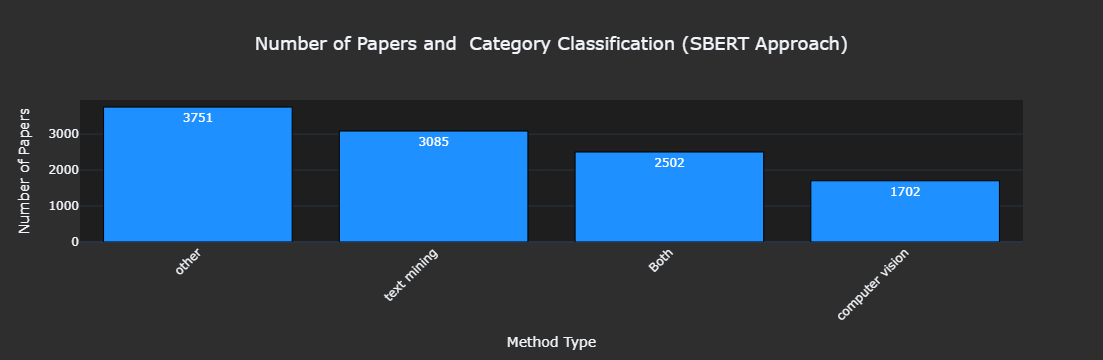

In [29]:

# Get the counts of each method type
method_type_counts = filtered_papers['Method_Type'].value_counts()

# Create a bar plot with improved style and theme
fig = go.Figure(data=[go.Bar(
    x=method_type_counts.index,  # Method types as x-axis labels
    y=method_type_counts.values,  # Number of papers as y-axis values
    text=method_type_counts.values,  # Text to display on top of each bar
    marker=dict(color='dodgerblue', line=dict(color='black', width=1))  # Custom bar color with border
)])

# Update layout with enhanced styling
fig.update_layout(
    title='Number of Papers and  Category Classification (SBERT Approach)',
    title_font_size=18,  # Title font size
    title_x=0.5,  # Center the title
    xaxis_title='Method Type',
    yaxis_title='Number of Papers',
    xaxis_tickangle=-45,  # Angle the x-axis labels for better readability
    template='plotly_dark',  # Dark theme for high contrast
    showlegend=False,  # Hide legend as it's unnecessary here
    plot_bgcolor='#1E1E1E',  # Background color for the plot area
    paper_bgcolor='#2E2E2E',  # Background color for the paper area

)

# Show the plot
fig.show()


In [30]:
filtered_papers[['Title','Method_Type']].to_csv('results/Task2_Classification_results.csv')

**Comparison with Keyword based appoach** 

In [31]:
# Convert the method categories keywords to lowercase for case-insensitive matching
method_categories_lower = {
    category: [kw.lower() for kw in keywords]
    for category, keywords in method_categories.items()
}

# Function to classify the paper based on its abstract
def classify_based_on_keyword(abstract):
    abstract_lower = abstract.lower()  # Convert the abstract to lowercase
    
    # Track categories that have matching keywords
    matched_categories = []

    # Check if any keywords match for 'text mining'
    if any(keyword in abstract_lower for keyword in method_categories_lower["text mining"]):
        matched_categories.append("text mining")
    
    # Check if any keywords match for 'computer vision'
    if any(keyword in abstract_lower for keyword in method_categories_lower["computer vision"]):
        matched_categories.append("computer vision")
    
    # Classification logic based on the number of matched categories
    if "text mining" in matched_categories and "computer vision" in matched_categories:
        return "both"
    elif "text mining" in matched_categories:
        return "text mining"
    elif "computer vision" in matched_categories:
        return "computer vision"
    else:
        return "other"  # If no match for either category


# Apply the classification function to each paper's abstract
data_with_abstract_keyword['Category'] = data_with_abstract_keyword['Abstract'].apply(classify_based_on_keyword)

# Get the count of papers in each category
category_counts = data_with_abstract_keyword['Category'].value_counts()

# Print the category counts
print(category_counts)


Category
other              9300
text mining        1485
computer vision     447
both                  5
Name: count, dtype: int64


In [32]:
# Get the counts of each method type
method_type_counts = data_with_abstract_keyword['Category'].value_counts()

# Create a bar plot with improved style and theme
fig = go.Figure(data=[go.Bar(
    x=method_type_counts.index,  # Method types as x-axis labels
    y=method_type_counts.values,  # Number of papers as y-axis values
    text=method_type_counts.values,  # Text to display on top of each bar
    marker=dict(color='dodgerblue', line=dict(color='black', width=1))  # Custom bar color with border
)])

# Update layout with enhanced styling
fig.update_layout(
    title='Number of Papers and Category Classification (Keyword Search Approach)',
    title_font_size=18,  # Title font size
    title_x=0.5,  # Center the title
    xaxis_title='Method Type',
    yaxis_title='Number of Papers',
    xaxis_tickangle=-45,  # Angle the x-axis labels for better readability
    template='plotly_dark',  # Dark theme for high contrast
    showlegend=False,  # Hide legend as it's unnecessary here
    plot_bgcolor='#1E1E1E',  # Background color for the plot area
    paper_bgcolor='#2E2E2E',  # Background color for the paper area
    margin=dict(l=50, r=50, t=50, b=50)  # Adjust margins for readability
)

# Show the plot
fig.show()


**Results Summary:**<br> 
The SBERT-based classification method outperforms the keyword-based approach in several key areas. While SBERT provides more accurate categorizations, especially in identifying papers that involve both text mining and computer vision (2502 papers classified as "Both"), the keyword-based method struggles to classify mixed-method papers, reporting only 5. Additionally, SBERT avoids overclassifying papers into the "Other" category, unlike the keyword method, which categorizes 9300 papers as "Other". This highlights SBERT's superior ability to capture contextual and hybrid method usage in papers.

### TASK 3 : Extract and report the name of the method used for each relevant paper.

**Consolidated Keywords set used in data collection query**

In [33]:
Apporaches = [
        "feedforward neural network", "neural net algorithm", "multilayer perceptron", 
        "convolutional neural network", 
        "recurrent neural network", "long short-term memory network", "CNN", "GRNN", 
        "RNN", "LSTM", "computer vision", "vision model", "image processing", "vision algorithms", 
        "computer graphics and vision", "object recognition", "scene understanding",
        "natural language processing", "text mining", "NLP", "computational linguistics", 
        "language processing", "text analytics", "textual data analysis", 
        "speech and language technology", "language modeling", "computational semantics",
        "generative artificial intelligence", "generative AI", "generative deep learning", 
        "generative models",
        "transformer models", "self-attention models", "transformer architecture", 
        "transformer", "attention-based neural networks", "transformer networks", 
        "sequence-to-sequence models",
        "large language model", "LLM", "transformer-based model", "pretrained language model", 
        "generative language model", "foundation model", "state-of-the-art language model",
        "multimodal model", "multimodal neural network", "vision transformer", "diffusion model", 
        "generative diffusion model", "diffusion-based generative model", "continuous diffusion model"
    ]


**Embeddings for the keywords**

In [34]:
 Apporaches_embedding = model.encode(Apporaches, convert_to_tensor=True)

In [35]:
# Function to identify the method with the highest similarity for each abstract
def extract_methods(abstract_embedding, approaches_embeddings, approaches):
    """
    This function calculates the cosine similarities between the abstract's embedding 
    and a list of approach embeddings, then returns the approach with the highest similarity.
    
    Parameters:
        abstract_embedding (tensor): The embedding of the paper's abstract.
        approaches_embeddings (tensor): Embeddings for various approaches to compare with the abstract.
        approaches (list): List of method names corresponding to the embeddings.
        
    Returns:
        best_match (str): The method name with the highest similarity to the abstract.
    """
    # Compute cosine similarities between the abstract and each approach's embedding
    cosine_similarities = util.cos_sim(abstract_embedding, approaches_embeddings)
    
    # Find the index of the approach with the highest similarity score
    best_match_idx = torch.argmax(cosine_similarities).item()
    
    # Get the approach name and the similarity value for the best match
    best_match = approaches[best_match_idx]
    best_similarity = cosine_similarities[0][best_match_idx].item()
    
    # Return the approach with the highest similarity
    return best_match


In [36]:
# Apply the function to each abstract in the dataset
filtered_papers['Method_used'] = filtered_papers['Abstract_Embeddings'].apply(
    lambda embedding: extract_methods(embedding, Apporaches_embedding, Apporaches)
)


C:\Users\dsohi\AppData\Local\Temp\ipykernel_14772\2319160210.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
results = filtered_papers[['Title','Method_used']]
filtered_papers[['Title','Method_used']]

Title  \
1      Characterization of arteriosclerosis based on ...   
2      Multi-scale input layers and dense decoder agg...   
3      An initial game-theoretic assessment of enhanc...   
4      Truncated M13 phage for smart detection of E. ...   
5      AI for Multistructure Incidental Findings and ...   
...                                                  ...   
11445  The characteristics of epidemics and invasions...   
11446  Effects of sales promotion on smoking among U....   
11447  Hypertension in an inner-city minority population   
11448  Aerosol transmission of a viable virus affecti...   
11449  Role of desolvation energy in the nonfacilitat...   

                        Method_used  
1      computer graphics and vision  
2                  image processing  
3                               RNN  
4        feedforward neural network  
5                       text mining  
...                             ...  
11445              multimodal model  
11446    continuous diffusion model  
11447                          LSTM  
11448               diffusion model  
11449               diffusion model  

[11040 rows x 2 columns]

In [38]:

# Get the counts of each method used in the filtered papers
method_counts = filtered_papers['Method_used'].value_counts()
method_counts

Method_used
text analytics                        1195
feedforward neural network             960
multimodal neural network              935
pretrained language model              756
natural language processing            747
RNN                                    713
text mining                            650
vision model                           624
LSTM                                   498
image processing                       448
vision transformer                     311
CNN                                    305
sequence-to-sequence models            273
neural net algorithm                   266
long short-term memory network         233
convolutional neural network           200
textual data analysis                  184
recurrent neural network               183
generative deep learning               160
vision algorithms                      130
computer graphics and vision           128
computer vision                        122
language modeling                      101

**Top 10 Methods Used in Papers**

In [39]:
# Flatten the list of methods used in the 'Method_used' column and count frequencies
all_methods = [method for method in filtered_papers['Method_used']]

# Count the frequency of each method using Counter
method_counts = Counter(all_methods)

# Get the top 10 most common methods
top_10_methods = method_counts.most_common(10)

# Unzip the method and count data for plotting
methods, counts = zip(*top_10_methods)

# Create a Plotly bar chart with frequency labels on top of the bars
fig = go.Figure(data=[go.Bar(
    x=methods, 
    y=counts, 
    text=counts,  # Add frequency labels
    marker=dict(
        color=counts, 
        colorscale='Viridis',  # More visually appealing color scale
        line=dict(color='black', width=1)  # Add border around bars
    )
)])

# Update layout with enhanced styling
fig.update_layout(
    title='Top 10 Methods Used in Papers',
    title_font_size=18,  # Increase title font size
    title_x=0.5,  # Center the title
    xaxis_title="Method",
    yaxis_title="Frequency",
    template='plotly_dark',  # Dark theme for high contrast
    xaxis_tickangle=45,  # Angle x-axis labels for better readability
    showlegend=False,  # Hide legend as it's unnecessary here
    plot_bgcolor='#1E1E1E',  # Background color for the plot area
    paper_bgcolor='#2E2E2E',  # Background color for the paper area
    margin=dict(l=50, r=50, t=50, b=50)  # Adjust margins for readability
)

# Show the plot
fig.show()


**Tree map tto visulaise method used and count of papers**

In [40]:
# Get the counts of each method used in the filtered papers
method_counts = filtered_papers['Method_used'].value_counts()

# Create a DataFrame with the method names (approaches) and their counts
data = pd.DataFrame({
    "Approach": method_counts.index,
    "Count": method_counts.values
})

# Create the treemap using Plotly
fig = px.treemap(data, 
                 path=["Approach"],  # Single-level path (approach)
                 values="Count",  # The count for each approach
                 title="Approach Distribution in Papers",
                 color="Count",  # Color based on the count of each method
                 color_continuous_scale="Viridis")

fig.update_layout(
    width=1000,  # Width of the plot
    height=800,  # Height of the plot
)

# Show the plot
fig.show()


In [41]:
results.to_csv('results/Task3_method_identification_results.csv')

In [42]:
filtered_papers.to_csv('results/Dataset_with_complete_results.csv')

In [43]:
#!pip freeze > requirements.txt
